In [1]:
#tools
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import KNeighborsClassifier









In [2]:
bedforms = pd.read_csv('https://raw.githubusercontent.com/elliesch/bedfinder/refs/heads/main/data/BedformData_full.csv')


In [3]:
bedforms.head()

,Site,ORIG_FID,Width,Length,Orient,Area,Elong,Bed,Topo,Y/N
0,1,0,10.000,50.990,78.699997,500.000000,5.099000,O,S,0
1,1,1,32.192,67.082,63.400002,1643.848000,2.083810,O,S,0
2,1,2,51.887,86.180,129.199997,2606.919966,1.660917,O,S,0
3,1,3,9.315,13.749,21.299999,64.038000,1.476006,O,S,0
4,1,4,10.000,14.142,45.000000,100.000000,1.414200,O,S,0


In [4]:

# Filter out samples where 'Y/N' column is 1
real_bedforms = bedforms[bedforms['Y/N'] == 1]

# Save the filtered data to a new file (optional)
real_bedforms.to_csv('bedforms_real.csv', index=False)

# Display the first few rows
real_bedforms.head()


,Site,ORIG_FID,Width,Length,Orient,Area,Elong,Bed,Topo,Y/N
31304,1,35,9.315,13.749,21.299999,64.03800,1.476006,O,S,1
31305,1,50,9.315,13.749,111.300003,64.03800,1.476006,O,S,1
31306,1,73,119.922,330.151,144.899994,29252.48555,2.753048,O,S,1
31307,1,94,168.944,440.846,145.800003,49649.28231,2.609421,O,S,1
31308,1,108,9.315,13.749,21.299999,64.03800,1.476006,O,S,1


In [5]:
real_bedforms.columns

Index(['Site', 'ORIG_FID', 'Width', 'Length', 'Orient', 'Area', 'Elong', 'Bed',
       'Topo', 'Y/N'],
      dtype='object')

What we're interested in here is the type of bedform and each descriptor fits into each.  The types of possible bedforms are below:

In [6]:
# List unique values in the 'Bed' column
unique_bedforms = real_bedforms['Bed'].unique()

# Display the unique bedforms
print("Possible bedforms in the dataset:")
print(unique_bedforms)


Possible bedforms in the dataset:
['O' 'V']


And here is the type of topography associated with each sample:

In [7]:
# List unique values in the 'Bed' column
unique_topo = real_bedforms['Topo'].unique()

# Display the unique bedforms
print("Possible topography in the dataset:")
print(unique_topo)


Possible topography in the dataset:
['S' 'C']


Okay now that we've done that, lets explore! This dataset is a quantitative dataset of streamlined subglacial bedforms from 9 regions around the deglaciated northern hemisphere.  It has measurements for each landform including width, length, and area, as well as the orientation.  There is also a measurement called elongation, which is length divided by width.  As Elongation increases, ice flow ideally increases.

Decision Tree Classifier Results for 'Bed':
              precision    recall  f1-score   support

           O       0.90      0.90      0.90      2664
           V       0.66      0.66      0.66       788

    accuracy                           0.84      3452
   macro avg       0.78      0.78      0.78      3452
weighted avg       0.84      0.84      0.84      3452

Confusion Matrix:
 [[2392  272]
 [ 267  521]]


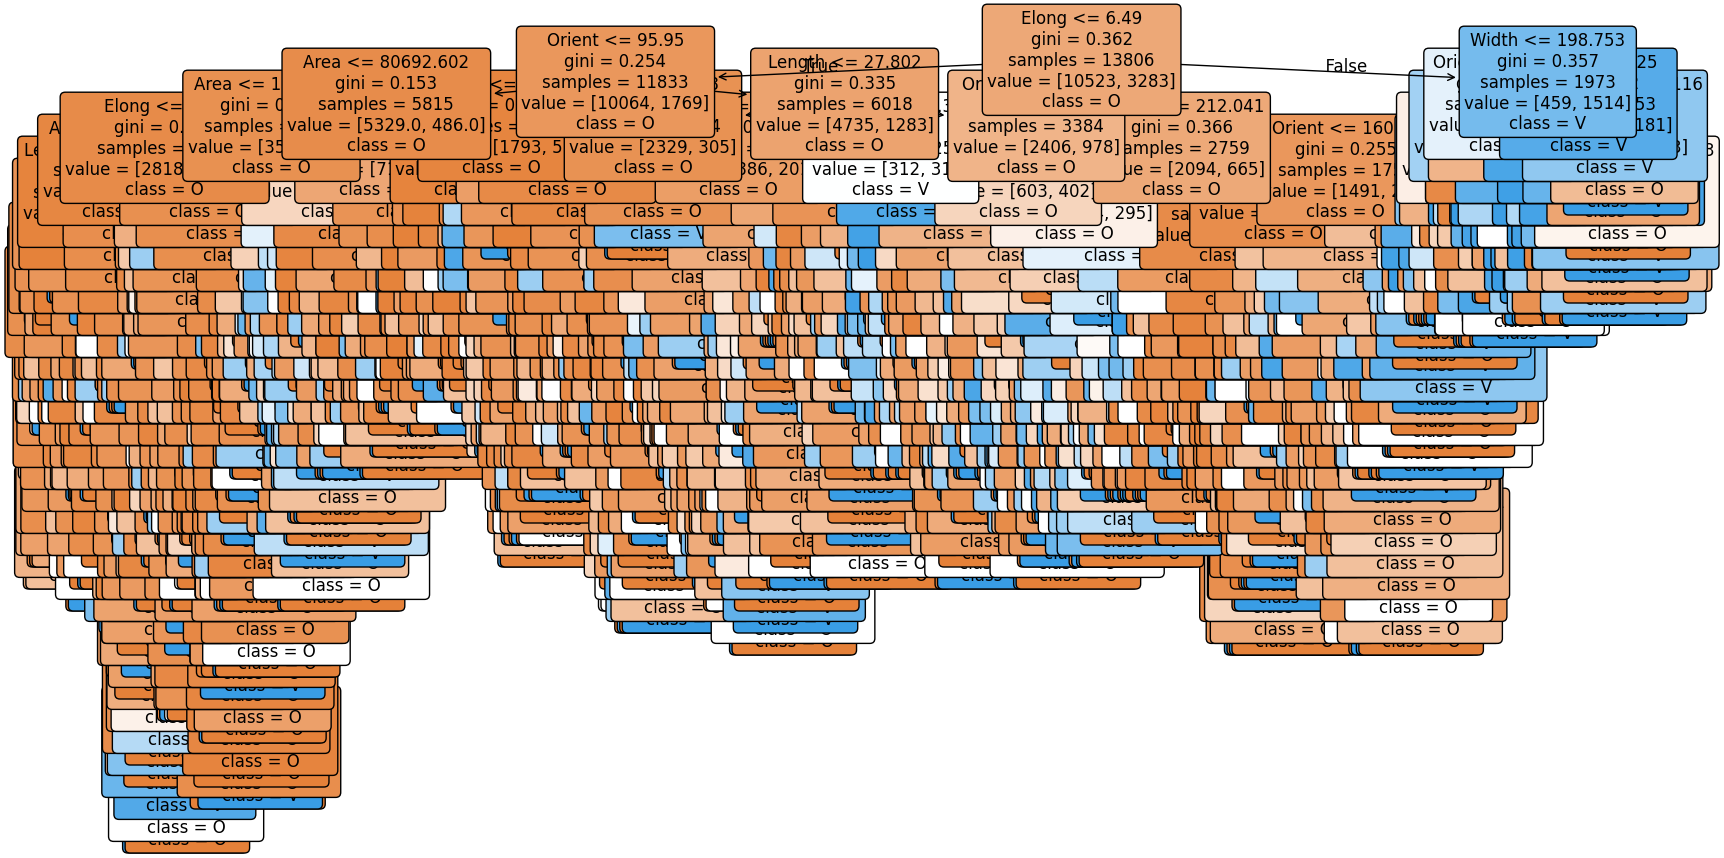

In [8]:
# Prepare the features and target variable
X = real_bedforms[['Width', 'Length', 'Orient', 'Area', 'Elong']]
y = real_bedforms['Bed']  # Assuming 'Bed' is a categorical variable

# Train-test split and Decision Tree model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Model evaluation
dt_y_pred = dt_model.predict(X_test)
print("Decision Tree Classifier Results for 'Bed':")
print(classification_report(y_test, dt_y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_y_pred))

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=dt_model.classes_, rounded=True, fontsize=12)
plt.show()


It seems like decision trees are really good for visualizing one variable, such as the classification of elongation in bedforms to delineate "fast" vs "slow" paleo-glaciers.  However, when used to categorize a variety of variables it gets pretty complex pretty quickly.

KNN Classifier Results:
              precision    recall  f1-score   support

           O       0.90      0.96      0.93      2664
           V       0.81      0.63      0.71       788

    accuracy                           0.88      3452
   macro avg       0.85      0.79      0.82      3452
weighted avg       0.88      0.88      0.88      3452

Confusion Matrix:
 [[2547  117]
 [ 292  496]]


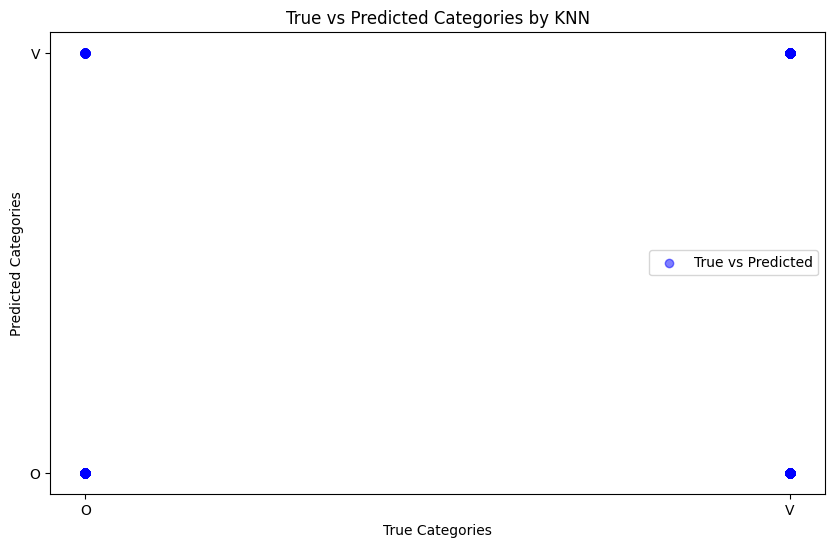

In [9]:

# Prepare the features and target variable
X = real_bedforms[['Width', 'Length', 'Orient', 'Area', 'Elong']]  # Features
y = real_bedforms['Bed']  # Target (assumed to be categorical for categorization)

# Step 1: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Normalize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Initialize and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors based on experimentation
knn_model.fit(X_train_scaled, y_train)

# Step 4: Make predictions on the test data
y_pred = knn_model.predict(X_test_scaled)

# Step 5: Evaluate the model's performance
print("KNN Classifier Results:")
print(classification_report(y_test, y_pred))  # Detailed classification report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))  # Confusion matrix

# Optionally, you can visualize how well the model predicts by comparing true vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, c='blue', alpha=0.5, label='True vs Predicted')
plt.xlabel('True Categories')
plt.ylabel('Predicted Categories')
plt.title('True vs Predicted Categories by KNN')
plt.legend()
plt.show()


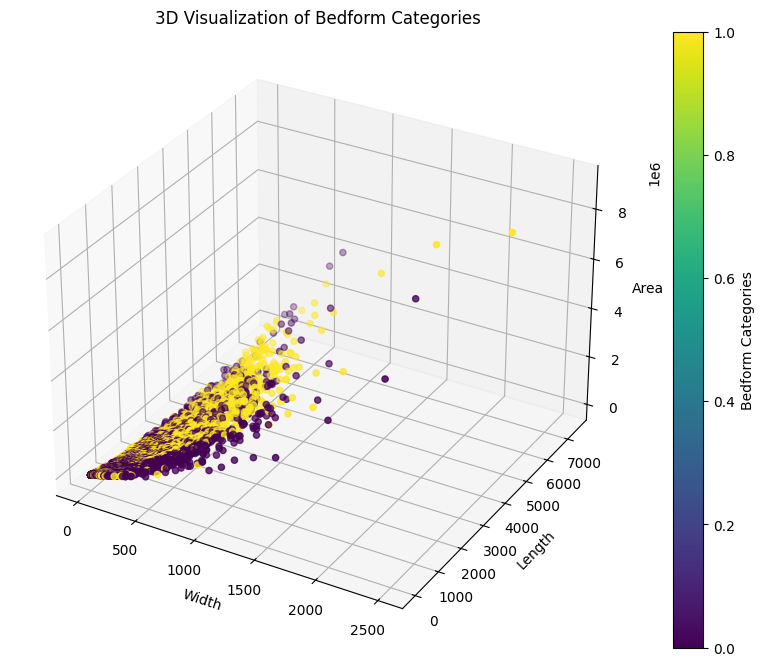

In [10]:

# Convert the 'Bed' column from categorical values to numeric (if it contains categorical labels like 'O', 'S', etc.)
bedform_labels = real_bedforms['Bed'].astype('category').cat.codes  # Convert to numeric codes

# Example: 3D scatter plot to visualize the clusters (if appropriate)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot using 3 features (e.g., Width, Length, and Area) and the numeric labels for coloring
scatter = ax.scatter(real_bedforms['Width'], real_bedforms['Length'], real_bedforms['Area'], c=bedform_labels, cmap='viridis')

ax.set_xlabel('Width')
ax.set_ylabel('Length')
ax.set_zlabel('Area')
plt.title('3D Visualization of Bedform Categories')

# Show color bar to indicate which category corresponds to which color
cbar = plt.colorbar(scatter)
cbar.set_label('Bedform Categories')

plt.show()


Above we have visualized clustering of each bedform.  We can see that area, width, and length all increase with each other, which makes a lot of sense.  The two categories of bedforms that I can have are "O" and "V".  I now want to use some tools to categorize length, width, area, and elongation into these two categories.

# Logistic Regression


In [11]:

# Preprocessing
X = real_bedforms[['Area', 'Length', 'Width', 'Elong']]
y = real_bedforms['Bed']  # Assuming 'Bed' contains the values 'O' and 'V'

# Fill missing values if needed
X = X.fillna(X.mean())

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression Model
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = log_model.predict(X_test_scaled)

# Evaluate
print("Logistic Regression Results:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Logistic Regression Results:
              precision    recall  f1-score   support

           O       0.86      0.97      0.91      2664
           V       0.81      0.45      0.58       788

    accuracy                           0.85      3452
   macro avg       0.83      0.71      0.75      3452
weighted avg       0.85      0.85      0.83      3452

Confusion Matrix:
 [[2582   82]
 [ 432  356]]


The precision values here means that 86% of the time, this linear regression is correctly categorizing the sample into the "O" bucket and 81% of the time correctly into the "V" bucket.  86% of the categorizations into the "O" bucket were correct, in other words.  A recall of .97 means that the 97% of the "O" categorizations were predicted correctly, which is pretty good.
The accuracy of this model predicting which category a sample belongs in is 85%, which is pretty good and also suggests to me that "O" and "V" landforms are pretty distinct.  
This all suggests that the logistic regression is doing a pretty good job at catching "O" bedforms, although there may be some class imbalance, meaning the model is more likely to predict an "O" rather than a "V".  This model is less good at catching "V"s.  Lets try a different method.

# Neural Network

In [12]:

# Step 1: Define the features and target variable
X = real_bedforms[['Area', 'Length', 'Width', 'Elong']]  # Features
y = real_bedforms['Bed']  # Target (binary classification)

# Convert categorical labels to numeric values
y = y.map({'O': 0, 'V': 1})

# Step 2: Handle missing values and scaling (already done)
X = X.fillna(X.mean())  # Fill missing values with the column mean
scaler = StandardScaler()  # Standardize the features
X_scaled = scaler.fit_transform(X)  # Fit and transform the features

# Step 3: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4: Build a neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Input layer with 64 units and ReLU activation
model.add(Dense(32, activation='relu'))  # Hidden layer with 32 units and ReLU activation
model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification

# Step 5: Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Step 6: Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Step 7: Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype(int)  # Predict and convert probabilities to binary (0 or 1)

# Step 8: Print evaluation results
print("Neural Network Results:")
print(classification_report(y_test, y_pred))  # Detailed classification report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))  # Confusion matrix


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
432/432 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8076 - loss: 0.4879 - val_accuracy: 0.8618 - val_loss: 0.3725
Epoch 2/20
432/432 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8497 - loss: 0.3929 - val_accuracy: 0.8621 - val_loss: 0.3709
Epoch 3/20
432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8552 - loss: 0.3774 - val_accuracy: 0.8633 - val_loss: 0.3641
Epoch 4/20
432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8535 - loss: 0.3789 - val_accuracy: 0.8624 - val_loss: 0.3617
Epoch 5/20
432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8569 - loss: 0.3708 - val_accuracy: 0.8601 - val_loss: 0.3640
Epoch 6/20
432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8528 - loss: 0.3799 - val_accuracy: 0.8630 - val_loss: 0.3556
Epoch 7/20
432/432 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8536 - loss: 0.3763 - val_accuracy: 0.8598 - val_loss: 0.3591
Epoch 8/20
432/432 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8517 - loss: 0.3808 - val_accuracy: 0.

The neural network did a great job.  This is probably more complex a tool than we really need, as neural networks are really good at detecting non-linear, complex relationships.  Nonetheless, we are correctly classifying 86% of the O bedforms and 94% of the V bedforms.  This signifies that we are getting close to correctly classifying the bedform type based off of length, width, area, and elongation.

Decision Tree Results:
              precision    recall  f1-score   support

           O       0.88      0.86      0.87      2664
           V       0.56      0.58      0.57       788

    accuracy                           0.80      3452
   macro avg       0.72      0.72      0.72      3452
weighted avg       0.80      0.80      0.80      3452

Confusion Matrix:
[[2298  366]
 [ 328  460]]


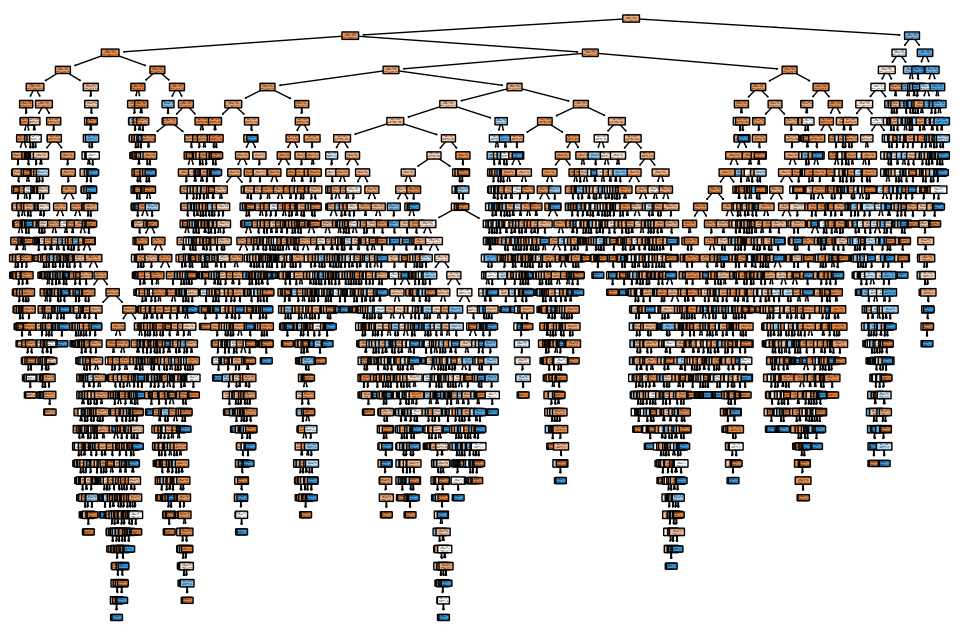

In [13]:

# Prepare the data
X = real_bedforms[['Area', 'Length', 'Width', 'Elong']]
y = real_bedforms['Bed']  # Replace with the target variable name if needed

# Drop rows with missing values
X = X.dropna()
y = y[X.index]  # Ensure that the target labels correspond to the cleaned data

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the model's performance
print("Decision Tree Results:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Visualize the decision tree
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plot_tree(dt_model, filled=True, feature_names=['Area', 'Length', 'Width', 'Elong'], class_names=['O', 'V'], rounded=True)
plt.show()


The decision tree also did a pretty good job with an overall accuracy of 80%, which is not quite as good as the neural network nor logistic regression, which had respective accuracies of 85 and 86%.  This could be due to a few reasons.  First, decision trees have the tendency to overfit, meaning that the tree might learn patterns distinct to a specific dataset.  Data trees can also get very "deep" and create overly complex decision boundaries that are not representative of the true data distribution.

The logistic regression may be performing better because it assumes a linear relationship, which may be what this dataset is actually representating.  "O" and "V" bedforms may actually be distinct enough to delineate through a regression.

Neural networks, by contrast, are highly flexible and can find intricate patterns in data.  While using the neural network may have been slightly overkill for this dataset, it might actually be pretty good at finding these relationships.

For a final means of studying this relationship, I wanted to try a Random Forest, which was not explicitly outlined in the Canvas module but might be a good solution for this type of data:

In [14]:

# Step 1: Define the features and target variable
X = real_bedforms[['Area', 'Length', 'Width', 'Elong']]  # Features
y = real_bedforms['Bed']  # Target (binary classification)

# Step 2: Handle missing values and scaling (already done)
X = X.fillna(X.mean())  # Fill missing values with the column mean
scaler = StandardScaler()  # Standardize the features
X_scaled = scaler.fit_transform(X)  # Fit and transform the features

# Step 3: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4: Build a Random Forest model
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 trees in the forest

# Step 5: Train the model
model_rf.fit(X_train, y_train)

# Step 6: Make predictions
y_pred_rf = model_rf.predict(X_test)

# Step 7: Print evaluation results
print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))  # Detailed classification report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))  # Confusion matrix


Random Forest Results:
              precision    recall  f1-score   support

           O       0.87      0.95      0.91      2664
           V       0.75      0.51      0.61       788

    accuracy                           0.85      3452
   macro avg       0.81      0.73      0.76      3452
weighted avg       0.84      0.85      0.84      3452

Confusion Matrix:
 [[2529  135]
 [ 383  405]]


The Random Forest model hasn't really increased the accuracy much, it is still 85%.  Overall, each of these methods have been better at predicting "O" bedforms than "V" bedforms, indicating that there is a discernable difference between these two datasets, but the datasets are also imbalanced.  Now that we have tried 4 different tools, all with a similar accuracy (between 80-86%), this would be a very good time to start adjusting our models and adding more training data to see if we could get higher accuracy and precision.

# Questions
### Which method did you like the most?
I liked the logistic regression the best for this analysis.  I think the question and dataset were both simple enough to be solved with a simple mathematical equation, which is why it worked the best.

### Which method did you like the least?
I didn't like it the least, but the decision tree definitely performed the poorest.  I believe this is due to the decision trees tendency to create overly complex decision boundaries that must be followed to the end once they have been established, producing misfits in the data.  I would be wary using this in the future.

### How did you score these supervised models?  
The neural network performed the best, with an accuracy of 86%.  Next was the logistic regression and random forest with an accuracy of 85%.  In last was the decision tree with an accuracy of 80%

### Did the output align with your geologic understanding?
Yup! There are two types of bedforms described by this dataset, "O" and "V". Geologists have worked for years discerning these two types of subglacial bedforms, and probably have used very similar ideas as these machine learning models use regarding their categorization.  These two bedforms are distinct from each other, but both probably have some areas of overlap which confuses the machine learning algorithms.

### Did you hyperparameter tune? Why or why not?
I decided to not hyperparameter tune.  For this exercise, I really wanted to see which machine learning method worked best right off the bat without any extra tuning.  I would definitely try to prune the decision tree, as well as try to identify which samples are compromising the 15-20% misfit seen in each model.  It may be that there is a third unquantified category that has not been considered.  

### How did you split your data? and why does that make sense for this dataset?
I split my data with an 80-20 train test splitting.  This meant that 20% of the data was used in the initial test set to make the categories, and 80% was used to train the dataset.  This dataset is pretty big, and doing this ensured that there was enough testing data but also much more to train the dataset with.  

### What did you want to learn more about?
I would be curious to add geographic location to this dataset.  As these are all sub-glacial bedforms created during the last glacial maximum, it would be interesting to see the distribution of elongation (representative of glacier speed) regarding the bedforms latitude.

### Did you pre-process your data?
I did a little bit.  This dataset is initially comprised of verified bedforms and unverified bedforms, the latter of which are to be used as training data.  As a first pass, I excluded any unverified landform as to not make categorization more complicated.  This was a good idea too, because none of the methods had accuracy of over 86%.  As a next step, I would first hyperparameterize each method to get a higher accuracy, and then I would use this initial dataset as my test set, and use a the unverified landforms as a test set.  I also had to do a bit of binarizing of qualitative descriptors to make the machine learning accessible.

### Do all models require pre-processing?
Probably not.  There are datasets that are entirely numeric.  However, the chances of having such a large data set that has no errors is pretty small, and there should probably be at least a bit of preventative pre-processing that is done to ensure no missing values will impact the dataset.